In [1]:
from tensorflow.keras.datasets import cifar10 # Загружаем базу cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Базовые слои для счёрточных сетей
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils # Используем для One Hot Encoding
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
from google.colab import files # Для работы с файлами
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Для отрисовки графиков
from PIL import Image # Для работы с изображениями
import random # Для генерации случайных чисел 
import math # Для округления
import os # Для работы с функциями операционной системы
from google.colab import drive # Для работы с Google Drive

%matplotlib inline

In [2]:
# Загружаем базу изображений с правильными ответами Cifar10
(x_train, y_train_original), (x_test, y_test_original) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
# Выводим размерности обучающей и тестовой выборки
print("Обучающая выборка:")
print(x_train.shape)
print()

print("Правильные ответы в обучающей выборке:")
print(y_train_original.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print()

print("Правильные ответы в тестовой выборке:")
print(y_test_original.shape)
print()

Обучающая выборка:
(50000, 32, 32, 3)

Правильные ответы в обучающей выборке:
(50000, 1)

Тестовая выборка:
(10000, 32, 32, 3)

Правильные ответы в тестовой выборке:
(10000, 1)



In [4]:
# Определяем названия классов изображений в зависимости от лэйбла
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

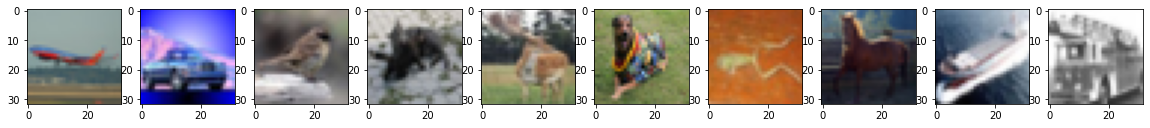

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [5]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие им лэйблы
plt.show()
print("Правильные ответы:", y)


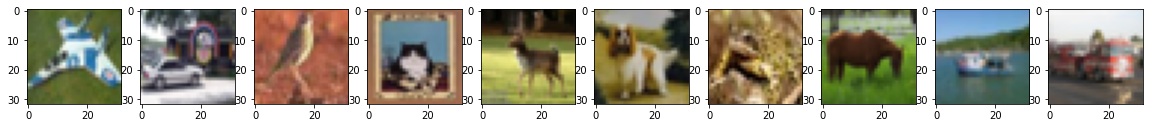

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [6]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие картинкам лэйблы
plt.show()
print("Правильные ответы:", y)


In [7]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[45477], "->", y_train[45477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])

Обучающая выборка:
[1] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5] -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
[9] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
# Разделяем тестовую выборку на проверочную и тестовую
x_val = x_test[0:8000]
y_val = y_test[0:8000]

x_test = x_test[8000:]
y_test = y_test[8000:]


In [9]:
# Проверим еще раз размерности выборотк

print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print()

print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(50000, 32, 32, 3)
(50000, 10)

Проверочная выборка:
(8000, 32, 32, 3)
(8000, 10)

Тестовая выборка:
(2000, 32, 32, 3)
(2000, 10)


#Обучение н.с.

In [10]:
# задаём batch_size
batch_size = 100

# Я испробовал разный размер окна свёртки. 3х3 даёт лучшие результаты, поэтому оставляю его.

# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3), name="bn0"))

# Подход 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer1"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer1"))
model.add(Dropout(0.2, name="Dropout-layer1"))
model.add(BatchNormalization(name = "bn1"))

# Подход 2. Выявляем больше признаков
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer3"))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer4"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer2"))
model.add(Dropout(0.2, name="Dropout-layer2"))
model.add(BatchNormalization(name = "bn2"))

# Подход. Выявляем больше признаков
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer5"))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer6"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer3"))
model.add(Dropout(0.2, name="Dropout-layer3"))
model.add(BatchNormalization(name = "bn3"))

# Подход. Выявляем больше признаков
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name="Conv2D-layer7"))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', name="Conv2D-layer8"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer4"))
model.add(Dropout(0.2, name="Dropout-layer4"))
model.add(BatchNormalization(name = "bn4"))

# Этот доп. слой BatchNormalization() очень сильно сокращает время необх. для обучения н.с.
model.add(BatchNormalization())
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten(name="flatten"))
# Выходной полносвязный классифицирующий слой
model.add(Dense(10, activation='softmax', name = "labels"))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bn0 (BatchNormalization)    (None, 32, 32, 3)         12        
                                                                 
 Conv2D-layer1 (Conv2D)      (None, 32, 32, 32)        896       
                                                                 
 Conv2D-layer2 (Conv2D)      (None, 32, 32, 32)        9248      
                                                                 
 mp2D-layer1 (MaxPooling2D)  (None, 16, 16, 32)        0         
                                                                 
 Dropout-layer1 (Dropout)    (None, 16, 16, 32)        0         
                                                                 
 bn1 (BatchNormalization)    (None, 16, 16, 32)        128       
                                                                 
 Conv2D-layer3 (Conv2D)      (None, 16, 16, 64)        1

Epoch 1/20
500/500 [==============================] - 27s 30ms/step - loss: 1.5026 - accuracy: 0.4755 - val_loss: 1.1293 - val_accuracy: 0.5984
Epoch 2/20
500/500 [==============================] - 15s 29ms/step - loss: 0.9553 - accuracy: 0.6639 - val_loss: 0.8542 - val_accuracy: 0.7107
Epoch 3/20
500/500 [==============================] - 15s 29ms/step - loss: 0.7676 - accuracy: 0.7305 - val_loss: 0.8216 - val_accuracy: 0.7280
Epoch 4/20
500/500 [==============================] - 15s 29ms/step - loss: 0.6747 - accuracy: 0.7635 - val_loss: 0.7486 - val_accuracy: 0.7485
Epoch 5/20
500/500 [==============================] - 15s 29ms/step - loss: 0.6059 - accuracy: 0.7891 - val_loss: 0.6984 - val_accuracy: 0.7670
Epoch 6/20
500/500 [==============================] - 15s 29ms/step - loss: 0.5486 - accuracy: 0.8072 - val_loss: 0.6485 - val_accuracy: 0.7815
Epoch 7/20
500/500 [==============================] - 15s 29ms/step - loss: 0.5052 - accuracy: 0.8233 - val_loss: 0.6114 - val_accuracy:

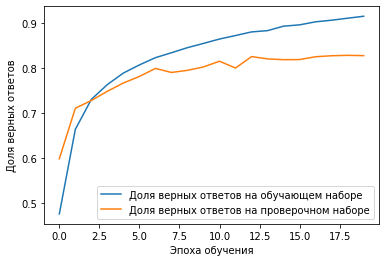

In [12]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2315 - accuracy: 0.9169 - val_loss: 0.5580 - val_accuracy: 0.8336
Epoch 2/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2224 - accuracy: 0.9204 - val_loss: 0.6061 - val_accuracy: 0.8329
Epoch 3/20
500/500 [==============================] - 14s 29ms/step - loss: 0.2144 - accuracy: 0.9228 - val_loss: 0.6291 - val_accuracy: 0.8259
Epoch 4/20
500/500 [==============================] - 15s 29ms/step - loss: 0.2051 - accuracy: 0.9268 - val_loss: 0.5945 - val_accuracy: 0.8355
Epoch 5/20
500/500 [==============================] - 14s 29ms/step - loss: 0.1954 - accuracy: 0.9292 - val_loss: 0.6059 - val_accuracy: 0.8359
Epoch 6/20
500/500 [==============================] - 14s 29ms/step - loss: 0.1963 - accuracy: 0.9302 - val_loss: 0.5987 - val_accuracy: 0.8386
Epoch 7/20
500/500 [==============================] - 15s 29ms/step - loss: 0.1818 - accuracy: 0.9345 - val_loss: 0.6280 - val_accuracy:

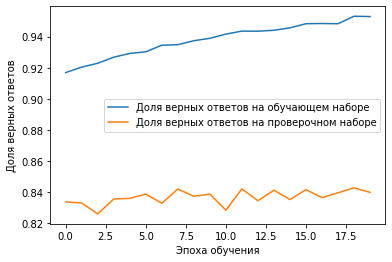

In [13]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 15s 29ms/step - loss: 0.1345 - accuracy: 0.9518 - val_loss: 0.6136 - val_accuracy: 0.8428
Epoch 2/10
500/500 [==============================] - 15s 29ms/step - loss: 0.1258 - accuracy: 0.9545 - val_loss: 0.6550 - val_accuracy: 0.8403
Epoch 3/10
500/500 [==============================] - 15s 29ms/step - loss: 0.1246 - accuracy: 0.9557 - val_loss: 0.6530 - val_accuracy: 0.8410
Epoch 4/10
500/500 [==============================] - 15s 29ms/step - loss: 0.1287 - accuracy: 0.9543 - val_loss: 0.6365 - val_accuracy: 0.8431
Epoch 5/10
500/500 [==============================] - 15s 29ms/step - loss: 0.1225 - accuracy: 0.9555 - val_loss: 0.6449 - val_accuracy: 0.8447
Epoch 6/10
500/500 [==============================] - 15s 29ms/step - loss: 0.1168 - accuracy: 0.9585 - val_loss: 0.6378 - val_accuracy: 0.8486
Epoch 7/10
500/500 [==============================] - 15s 29ms/step - loss: 0.1185 - accuracy: 0.9568 - val_loss: 0.9473 - val_accuracy:

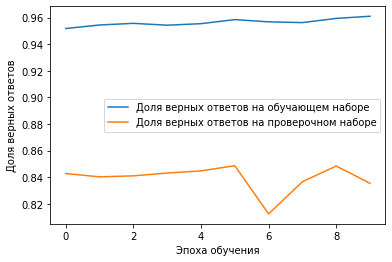

In [14]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()